## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [3]:
df.shape[0]

294478

c. The number of unique users in the dataset.

In [4]:
df['user_id'].unique().shape[0]

290584

d. The proportion of users converted.

In [5]:
#number of those who converted divided by the total number of users
df[df['converted'] == 1].shape[0] / df['converted'].shape[0] * 100

11.96591935560551

e. The number of times the `new_page` and `treatment` don't line up.

In [6]:
is_new_page = df['landing_page'] == 'new_page'
not_new_page = df['landing_page'] != 'new_page'
is_treatment = df['group'] == 'treatment'
not_treatment = df['group'] != 'treatment'

# I considered both situations when new_page didn't align with treatment and when treatment didn't align with new_page
# and added them up
df[is_new_page & not_treatment].shape[0] + df[not_new_page & is_treatment].shape[0]


3893

f. Do any of the rows have missing values?

In [7]:
df.isnull().any()

user_id         False
timestamp       False
group           False
landing_page    False
converted       False
dtype: bool

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
# Concatenate the data needed to be removed 
to_be_removed = pd.concat([df[is_new_page & not_treatment],df[not_new_page & is_treatment]])

#drop the data rows by index
df2 = df.drop(to_be_removed.index)

In [9]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [10]:
df2['user_id'].unique().shape[0]

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [11]:
df2[df2['user_id'].duplicated()].user_id

2893    773192
Name: user_id, dtype: int64

c. What is the row information for the repeat **user_id**? 

In [12]:
duplicated_row = df2[df2['user_id'].duplicated()]
duplicated_row

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [13]:
df2.drop(duplicated_row.index, inplace = True)
df2

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
...,...,...,...,...,...
294473,751197,2017-01-03 22:28:38.630509,control,old_page,0
294474,945152,2017-01-12 00:51:57.078372,control,old_page,0
294475,734608,2017-01-22 11:45:03.439544,control,old_page,0
294476,697314,2017-01-15 01:20:28.957438,control,old_page,0


`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [14]:
df2['converted'].sum() / df2['converted'].shape[0]

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [15]:
control = df2['group'] == 'control'
converted = df2['converted'] == 1
# I am using .sum() method to count the "1"s ...to save a few lines of code
df2['converted'][control & converted].sum() / df2[control].shape[0]

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [16]:
treatment = df2['group'] == 'treatment'
df2['converted'][treatment & converted].sum() / df2[treatment].shape[0]

0.11880806551510564

d. What is the probability that an individual received the new page?

In [17]:
new_page = df2['landing_page'] == 'new_page'
df2[new_page].shape[0] / df2.shape[0]

0.5000619442226688

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

**Your answer goes here.**

<span style="color: blue;">

**I believe there is no sufficient evidence to favor one page over the other.
These numbers alone gives us an idea about the data distribution, but is never enough to make any conclusions, and further statistical methods are to be performed to test for statistical significance.**
<span>

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**Put your answer here.**

<span style="color: Blue;">
    
    
**Null Hypothesis:  $p_{old}$** $\geq$ **$p_{new}$**


**Alternative Hypothesis: $p_{old}$** < **$p_{new}$** 
</span>.

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [18]:
# the same code from part I question 1 d.
p_new = df[df['converted'] == 1].shape[0] / df['converted'].shape[0]
p_new

0.11965919355605512

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [19]:
# the same code from part I question 1 d.
p_old = df[df['converted'] == 1].shape[0] / df['converted'].shape[0]
p_old

0.11965919355605512

c. What is $n_{new}$?

In [20]:
n_new = df2[df2['landing_page'] == 'new_page'].shape[0]
n_new

145310

d. What is $n_{old}$?

In [21]:
n_old = df2[df2['landing_page'] == 'old_page'].shape[0]
n_old

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [22]:
new_page_converted = np.random.choice([1,0],size = n_new, p = [p_new, 1 - p_new])
new_page_converted

array([0, 1, 0, ..., 1, 0, 0])

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [23]:
old_page_converted = np.random.choice([1,0],size = n_old, p = [p_old, 1 - p_old])
old_page_converted

array([0, 0, 0, ..., 0, 0, 0])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [24]:
#calculate p_new and p_old as a probabilty of getting "1" over the sample size
p_new = new_page_converted.sum() / new_page_converted.shape[0]
p_old = old_page_converted.sum() / old_page_converted.shape[0]

diff = p_new - p_old
diff

1.1880189131091567e-05

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [25]:
random.seed(42)
p_diffs = []
new_converted_simulation = np.random.binomial(n_new, p_new, 10000)/n_new
old_converted_simulation = np.random.binomial(n_old, p_old, 10000)/n_old
p_diffs = new_converted_simulation - old_converted_simulation


i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

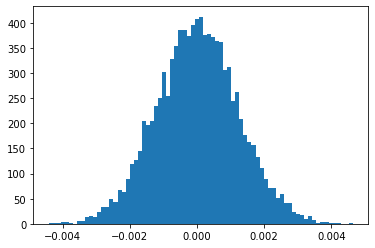

In [26]:
plt.hist(p_diffs, bins = 75);

<span style="color: blue;">
    
**This Plot looks like what I would expect as sample mean differences follows the central limit theorem 
and the resulting graph should be a bell-shaped curve around the mean which should be around zero as it represents the NULL hypothesis**
    
</span>

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [27]:
#using same code from a previous question 
#I take the difference between treatment group and control group (new-page and old-page)
prob_new = df2['converted'][treatment & converted].sum() / df2[treatment].shape[0]
prob_old = df2['converted'][control & converted].sum() / df2[control].shape[0]

ab_data_difference = prob_new - prob_old
print('ab_difference is ', ab_data_difference)
print('p-value for p_diffs > ab_data_difference = ', (p_diffs >= ab_data_difference).mean())

ab_difference is  -0.0015782389853555567
p-value for p_diffs > ab_data_difference =  0.9053


k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**Put your answer here.**

<span style="color: blue;">

**I calculated the p-value for a one-tailed test for whether the old page is better than the new page in term of conversion rates**


**The p-value is the area under the curve and it represents the probality given a certain condition, it is a common practice to consider a threshold of 0.05 for the significance level**


**Considering a significance level of 0.05 we fail to reject that the differences under the Null are greater than the differences under ab_data and we may conclude that the old page is better than the new page under 0.05 significance level.**
    
</span>

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [28]:
import statsmodels.api as sm

convert_old = df2['converted'][control & converted].sum()
convert_new = df2['converted'][treatment & converted].sum()
n_old = df2[control].shape[0]
n_new = df2[treatment].shape[0]

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [29]:
from statsmodels.stats.proportion import proportions_ztest
z_score, p_value = sm.stats.proportions_ztest([convert_new, convert_old], [n_new, n_old],alternative='larger')
print('Test statistic: ',z_score)
print('p-value: ',p_value)

Test statistic:  -1.3109241984234394
p-value:  0.9050583127590245


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**Put your answer here.**

<span style="color: blue;">

**The test statistic/ z-score is the number of times (in standard deviations) the difference between the hypothesized mean and the mean of differences between the two samples**

**The p-value is the area under the graph that represents a probability. In case of a one tailed test the area is represented as values less than 5%**

**The p-values in questions j. and k. are not identical to the p-values in question n. but they still have the same interpretation, as a p-value of 0.9 is not statistically significant...so again, we fail to reject the Null Hypothesis**

    
</span>

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Put your answer here.**

<span style="color: blue;">
        
**Logistic regression as it is mainly a Classification problem**
    


b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [30]:
df2['intercept'] = 1
df2[['ab_page']] = pd.get_dummies(df['group'], drop_first=True)
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [31]:
model = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
results = model.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [32]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Sat, 08 Jan 2022   Pseudo R-squ.:               8.077e-06
Time:                        03:14:05   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

**Put your answer here.**

<span style="color: Blue;">
    
**The p-value is 0.19**
    
**Null Hypothesis:  $p_{old}$** = **$p_{new}$**


**Alternative Hypothesis: $p_{old}$** $\neq$ **$p_{new}$** 
                                                                                   

**This is a two-talied test which has a different null/alternative hypotheses so it is different from the one-tailed test in the previous question. It is not strange to have a different p-value as they are testing two different sets of hypotheses, it is noteworthy that the two tailed test is concerned with values less than 2.5% and greater than 97.5% it adds up to 5% just like the one tailed test, but in reality the area under the curve for the two tails combined is less than a continous 5% in a one-tailed test.**

**note that the test statistic is -1.311 which is the same as the one in part II only the p-value is different.**
    
<span>

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Put your answer here.**

<span style="color: blue;">

**It is good to identify the main factors that contribute to the results and to what extent, espeicially the factors with greater coefficients. However, if these factors are not statistically significant it may be a hindrance to the accuracy of the model, also there may be an issue with multicolinearity, where a variable is directly related with another independent variable and not necessarily the one being tested**
    
    
</span>

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [33]:
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')

In [34]:
### Create the necessary dummy variables
df_new[['UK', 'US']]= pd.get_dummies(df_new['country'], drop_first = True)
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,UK,US
user_id,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,1,0


In [35]:
model = sm.Logit(df_new['converted'], df_new[['intercept', 'ab_page', 'US', 'UK']])
results2 = model.fit()
results2.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Sat, 08 Jan 2022   Pseudo R-squ.:               2.323e-05
Time:                        03:14:06   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0300      0.027    -76.249      0.000      -2.082      -1.978
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
US             0.0408      0.027      1.516      0.130      -0.012       0.093
UK             0.0506      0.028      1.784      0.074      -0.005       0.106
==============================================================================
"""

### ANSWER to Question g.
<span style="color: blue;">

**Considering the p-values of US, UK, ab_page, they are all greater than 0.05 so it appears that the country variable is not statistically significant in determining the outcome of conversion**

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [36]:
###Fit Your Linear Model And Obtain the Results
# This my original code that I will not be functional, I just kept it for you to check 

df_new['new_and_US'] =(df_new['ab_page'] == 1) & (df_new['US'] == 1)
to_binary1 = df_new['new_and_US'].astype(int)
df_new['new_and_US'] = to_binary1

# will do exactly the same for new_and_UK column
df_new['new_and_UK'] = (df_new['ab_page'] == 1) & (df_new['UK'] == 1)
to_binary = df_new['new_and_UK'].astype(int)
df_new['new_and_UK'] = to_binary

# I will drop my columns so that the changes are not save to the dataframe
#and I will use the code provided from the review feedback instead
df_new.drop(columns = ['new_and_US', 'new_and_UK'], axis = 1, inplace = True)

In [37]:
#This is a much cleaner code I got from the review feedback. Thanks !!

df_new['ab_UK'] = df_new['ab_page'] * df_new['UK']
df_new['ab_US'] = df_new['ab_page'] * df_new['US']

In [38]:
# an overview of the new columns
df_new[['ab_page', 'US', 'UK', 'ab_UK','ab_US']].head()

,ab_page,US,UK,ab_UK,ab_US
user_id,,,,,
834778,0,0,1,0,0
928468,1,1,0,0,1
822059,1,0,1,1,0
711597,0,0,1,0,0
710616,1,0,1,1,0


In [39]:
model2 = sm.Logit(df_new['converted'], df_new[['intercept', 'ab_page', 'US', 'UK', 'ab_UK','ab_US' ]])
results2 = model2.fit()
results2.summary()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Sat, 08 Jan 2022   Pseudo R-squ.:               3.482e-05
Time:                        03:14:07   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1920
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0040      0.036    -55.008      0.000      -2.075      -1.933
ab_page       -0.0674      0.052     -1.297      0.195      -0.169       0.034
US             0.0175      0.038      0.465      0.642      -0.056       0.091
UK             0.0118      0.040      0.296      0.767      -0.066       0.090
ab_UK          0.0783      0.057      1.378      0.168      -0.033       0.190
ab_US          0.0469      0.054      0.872      0.383      -0.059       0.152
==============================================================================
"""

<span style="color: Blue;">
    
**Again it appears that the country of the visitors is not a significant factor in determining the conversion rates as the p-values are all greater than 0.05**

## Conclusions
<span style="color: Blue;">
    
    
### Statistical reasoning
The assumption to be proved is that the new page is better than the old page in terms of conversions. In order to prove this assumption we had to adopt the "innocent till proven guilty" approach, so the subject of our tests is the opposite (that the old page is better than the new page)

Different statisitical tests/models were taken into consideration and they all came to the same conclusion, that the likelihood of the old page having better conversion rates is too significant to reject (so we can't embrace the assumption that the new page is better than the old page.)

It is better not to implement the new page and keep the old page as it is.


### Practical reasoning
It may require further investigations on why the older page seemed to perform better than the new page, as for some it may be a basic familiar sight as opposed to a perhaps complex new page with new features that aren't of interest to the visitors, and it is a subject of user experience analysis. It is worth mentioning that most customers who already converted had came through the old page, and this may suggest that the old page already had a tangible influence in their conversion rates, and it is not an easy task to outperform what seemed to be working.

I suggest collecting data to quatify metrics for user behaviour on the website and how they interact with the page. This may include estimating durations spent on page, parts of the page that are most viewed and interacted with..etc (not only the final part of actually converting).
    
in next projects, It is better to test for the most important factors in the old page, adopt them instead of changing them altogether, and change the least significat parts of the old page or improve them.

<a id='conclusions'></a>


Congratulations on completing the project! 

### Gather Submission Materials

Once you are satisfied with the status of your Notebook, you should save it in a format that will make it easy for others to read. You can use the __File -> Download as -> HTML (.html)__ menu to save your notebook as an .html file. If you are working locally and get an error about "No module name", then open a terminal and try installing the missing module using `pip install <module_name>` (don't include the "<" or ">" or any words following a period in the module name).

You will submit both your original Notebook and an HTML or PDF copy of the Notebook for review. There is no need for you to include any data files with your submission. If you made reference to other websites, books, and other resources to help you in solving tasks in the project, make sure that you document them. It is recommended that you either add a "Resources" section in a Markdown cell at the end of the Notebook report, or you can include a `readme.txt` file documenting your sources.

### Submit the Project

When you're ready, click on the "Submit Project" button to go to the project submission page. You can submit your files as a .zip archive or you can link to a GitHub repository containing your project files. If you go with GitHub, note that your submission will be a snapshot of the linked repository at time of submission. It is recommended that you keep each project in a separate repository to avoid any potential confusion: if a reviewer gets multiple folders representing multiple projects, there might be confusion regarding what project is to be evaluated.

It can take us up to a week to grade the project, but in most cases it is much faster. You will get an email once your submission has been reviewed. If you are having any problems submitting your project or wish to check on the status of your submission, please email us at dataanalyst-project@udacity.com. In the meantime, you should feel free to continue on with your learning journey by beginning the next module in the program.

# Resources
code from an earlier review